In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pydataset

### 1. Load the tips dataset from either pydataset or seaborn.

In [5]:
tips = sns.load_dataset("tips")

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.shape

(244, 7)

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [46]:
df = tips[['total_bill', 'tip']]

In [47]:
# assuming X and y are already defined
# create the model
model = LinearRegression()

# fit the model to trainig data
model.fit(df[X], df[y])

# make predictions
df['yhat'] = model.predict(df[X])

In [48]:
df.head()

,total_bill,tip,yhat
0,16.99,1.01,2.704636
1,10.34,1.66,2.006223
2,21.01,3.50,3.126835
3,23.68,3.31,3.407250
4,24.59,3.61,3.502822


### 3. Plot the residuals for the linear regression model that you made.

In [51]:
# residual = predicted - actual
df['residual'] = df.yhat - df.tip
df.head()

,total_bill,tip,yhat,residual
0,16.99,1.01,2.704636,1.694636
1,10.34,1.66,2.006223,0.346223
2,21.01,3.50,3.126835,-0.373165
3,23.68,3.31,3.407250,0.097250
4,24.59,3.61,3.502822,-0.107178


In [81]:
len(df)/2

122.0

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

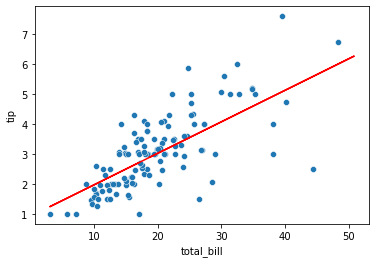

In [82]:
plt.plot(df.total_bill, df.yhat, color='red')
sns.scatterplot(x=df.total_bill.head(int(len(df)/2)), y=df.tip.head(int(len(df)/2)))

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [86]:
df['residual^2'] = df.residual**2
df.head()

,total_bill,tip,yhat,residual,residual^2
0,16.99,1.01,2.704636,1.694636,2.871792
1,10.34,1.66,2.006223,0.346223,0.119870
2,21.01,3.50,3.126835,-0.373165,0.139252
3,23.68,3.31,3.407250,0.097250,0.009458
4,24.59,3.61,3.502822,-0.107178,0.011487


In [101]:
# Sum of Squares Error
SSE = df["residual^2"].sum()
SSE

252.788743850776

In [130]:
# Explained Sum of Squares
ESS = ((df.yhat - df.tip.mean())**2).sum()
ESS

212.42373319840422

In [133]:
# Total Sum of Squares
TSS = SSE + ESS
TSS

465.2124770491802

In [134]:
# Mean Squared Error
MSE = SSE/len(df)
MSE

1.036019442011377

In [135]:
# Root Mean Squared Error
RMSE = MSE**0.5
RMSE

1.0178504025697377

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [136]:
df['baseline'] = df['tip'].mean()
df.head()

,total_bill,tip,yhat,residual,residual^2,baseline,baseline_residual,baseline_residual^2
0,16.99,1.01,2.704636,1.694636,2.871792,2.998279,-1.988279,3.953252
1,10.34,1.66,2.006223,0.346223,0.119870,2.998279,-1.338279,1.790990
2,21.01,3.50,3.126835,-0.373165,0.139252,2.998279,0.501721,0.251724
3,23.68,3.31,3.407250,0.097250,0.009458,2.998279,0.311721,0.097170
4,24.59,3.61,3.502822,-0.107178,0.011487,2.998279,0.611721,0.374203


In [137]:
# create column for baseline residuals
df['baseline_residual'] = df.tip - df.baseline

# create column for squared baseline residuals
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,total_bill,tip,yhat,residual,residual^2,baseline,baseline_residual,baseline_residual^2
0,16.99,1.01,2.704636,1.694636,2.871792,2.998279,-1.988279,3.953252
1,10.34,1.66,2.006223,0.346223,0.119870,2.998279,-1.338279,1.790990
2,21.01,3.50,3.126835,-0.373165,0.139252,2.998279,0.501721,0.251724
3,23.68,3.31,3.407250,0.097250,0.009458,2.998279,0.311721,0.097170
4,24.59,3.61,3.502822,-0.107178,0.011487,2.998279,0.611721,0.374203


In [138]:
SSE_baseline = df['baseline_residual^2'].sum()
SSE_baseline

465.2124770491804

In [139]:
MSE_baseline = SSE_baseline/len(df)
MSE_baseline

1.906608512496641

In [140]:
RMSE_baseline = MSE_baseline**0.5
RMSE_baseline

1.3807999538298954

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [141]:
if SSE > SSE_baseline:
    print('The baseline model performs better than our created model')
else:
    print('Our created model performs better than the baseline model')

Our created model performs better than the baseline model


### 7. What is the amount of variance explained in your model?

In [145]:
R2 = ESS/TSS
R2

0.4566165863516763

In [146]:
r2_score(df.tip, df.yhat)

0.45661658635167657

### 8. Is your model better than the baseline model?

Our model performs better than the baseline model

### 9. Create a file named evaluate.py that contains the following functions.

- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

Text(0, 0.5, 'yhat')

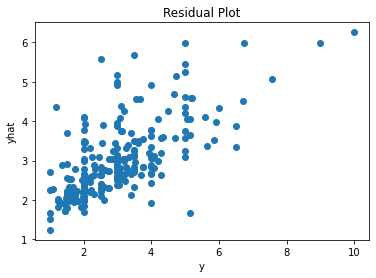

In [153]:
plt.scatter(df.tip, df.yhat)
plt.title('Residual Plot')
plt.xlabel('y')
plt.ylabel('yhat')

In [ ]:
def plot_residuals(y, yhat):
    

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [155]:
from pydataset import data
mpg = data('mpg')

In [157]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [158]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [161]:
df = mpg[['displ','hwy']]
df.head()

,displ,hwy
1,1.8,29
2,1.8,29
3,2.0,31
4,2.0,30
5,2.8,26


In [164]:
df['baseline'] = df.hwy.mean()
df.head()

,displ,hwy,baseline
1,1.8,29,23.440171
2,1.8,29,23.440171
3,2.0,31,23.440171
4,2.0,30,23.440171
5,2.8,26,23.440171


In [174]:
X = ['displ']
y = ['hwy']

In [176]:
# assuming X and y are already defined
# create the model
model = LinearRegression()

# fit the model to trainig data
model.fit(df[X], df[y])

# make predictions
df['yhat'] = model.predict(df[X])

In [177]:
df

,displ,hwy,baseline,yhat
1,1.8,29,23.440171,29.342591
2,1.8,29,23.440171,29.342591
3,2.0,31,23.440171,28.636473
4,2.0,30,23.440171,28.636473
5,2.8,26,23.440171,25.812002
...,...,...,...,...
230,2.0,28,23.440171,28.636473
231,2.0,29,23.440171,28.636473
232,2.8,26,23.440171,25.812002
233,2.8,26,23.440171,25.812002


In [178]:
df['residual'] = df.yhat - df.hwy
df['residual_baseline'] = df.baseline - df.hwy
df

,displ,hwy,baseline,yhat,residual,residual_baseline
1,1.8,29,23.440171,29.342591,0.342591,-5.559829
2,1.8,29,23.440171,29.342591,0.342591,-5.559829
3,2.0,31,23.440171,28.636473,-2.363527,-7.559829
4,2.0,30,23.440171,28.636473,-1.363527,-6.559829
5,2.8,26,23.440171,25.812002,-0.187998,-2.559829
...,...,...,...,...,...,...
230,2.0,28,23.440171,28.636473,0.636473,-4.559829
231,2.0,29,23.440171,28.636473,-0.363527,-5.559829
232,2.8,26,23.440171,25.812002,-0.187998,-2.559829
233,2.8,26,23.440171,25.812002,-0.187998,-2.559829


In [179]:
df['residual^2'] = df.residual**2
df['residual_baseline^2'] = df.residual_baseline**2

In [180]:
df.head()

,displ,hwy,baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
1,1.8,29,23.440171,29.342591,0.342591,-5.559829,0.117369,30.911699
2,1.8,29,23.440171,29.342591,0.342591,-5.559829,0.117369,30.911699
3,2.0,31,23.440171,28.636473,-2.363527,-7.559829,5.586258,57.151015
4,2.0,30,23.440171,28.636473,-1.363527,-6.559829,1.859205,43.031357
5,2.8,26,23.440171,25.812002,-0.187998,-2.559829,0.035343,6.552725


In [182]:
SSE = df["residual^2"].sum()
ESS = ((df.yhat - df.hwy.mean())**2).sum()
TSS = SSE + ESS
MSE = SSE/len(df)
RMSE = MSE**0.5
RMSE

3.8195566312014524

In [183]:
SSE_baseline = df["residual_baseline^2"].sum()
ESS_baseline = ((df.baseline - df.hwy.mean())**2).sum()
TSS_baseline = SSE_baseline + ESS_baseline
MSE_baseline = SSE_baseline/len(df)
RMSE_baseline = MSE_baseline**0.5
RMSE_baseline

5.941906221359356

In [184]:
if SSE > SSE_baseline:
    print('The baseline model performs better than our created model')
else:
    print('Our created model performs better than the baseline model')

Our created model performs better than the baseline model


In [185]:
R2 = r2_score(df.hwy, df.yhat)
R2

0.5867866723989039

In [189]:
R2_baseline = r2_score(df.hwy, df.baseline)
R2_baseline

0.0

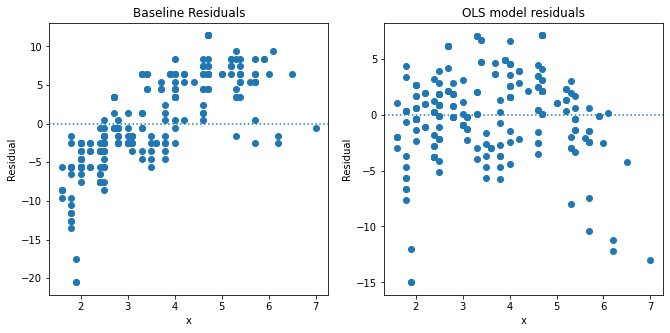

In [192]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.displ, df.residual_baseline)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.displ, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');